In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets 


X = np.random.rand(300,1)

y = 4 + 3 * X + np.random.randn(300,1)

for i in range(10):
    print(X[i], y[i])

[0.74751897] [5.28031092]
[0.78392162] [6.49045634]
[0.82180015] [6.03508617]
[0.2026274] [4.24135896]
[0.2324715] [4.72768098]
[0.03524204] [2.479953]
[0.16676002] [3.98152429]
[0.3315263] [4.92377018]
[0.08657805] [3.7267955]
[0.09302781] [4.39808042]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)
# 단순한 데이터 분류
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(240, 1)
(60, 1)
(60, 1)
(240, 1)


In [3]:
# 선형 회귀 모델 불러옴
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [4]:
# 학습된 모델을 사용하여 테스트 데이터 예측
y_pred = model.predict(X_test)


for i in range(10):
    print(X_test[i], y_test[i], y_pred[i])
    #입력, 실제 값, 학습한 값(예측한 y값)


#평가 지표 1. 평균 제곱 오차 2. 평균 절대 오차 3. 평균 제곱근 오차

[0.33003443] [5.8560314] [5.01798802]
[0.90083319] [6.37474027] [6.63256644]
[0.36344522] [3.4836099] [5.1124948]
[0.09302781] [4.39808042] [4.34758404]
[0.14897548] [5.19268203] [4.50583927]
[0.41243519] [4.05514211] [5.25106927]
[0.62367686] [4.66070325] [5.84859377]
[0.26288475] [4.78851043] [4.82804645]
[0.03524204] [2.479953] [4.18412948]
[0.57006863] [4.41437166] [5.69695595]


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 평균 제곱 오차
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {}'.format(mse))

# 평균 절대 오차
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error: {}'.format(mse))

# 평균 제곱근 오차
rmse = np.sqrt(mse)
print('Root Mean Error: {}'.format(rmse))


Mean Squared Error: 0.8454082747432997
Mean absolute Error: 0.7609150278970505
Root Mean Error: 0.8723044353303785


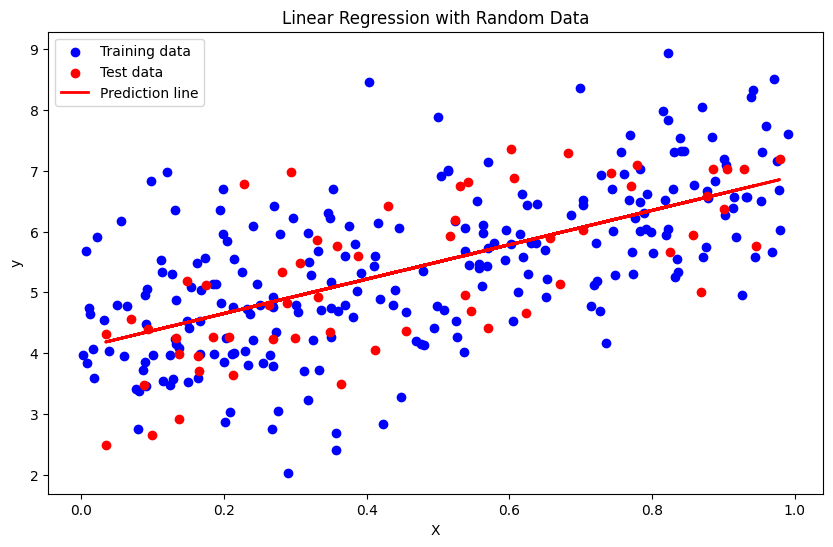

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 학습 데이터 산점도
plt.scatter(X_train, y_train, color='blue', label='Training data')

# 테스트 데이터 산점도
plt.scatter(X_test, y_test, color='red', label='Test data')

# 예측된 직선
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Random Data')
plt.legend()
plt.show()

Mean Squared Error (MSE): 4874978330.45153
Mean Absolute Error (MAE): 50755.434228295395
Root Mean Squared Error (RMSE): 69821.04503981254


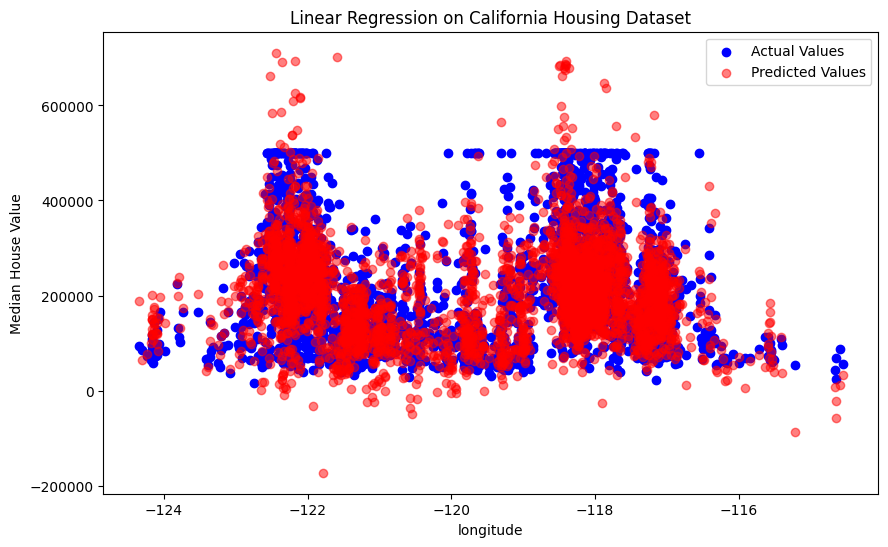

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. 데이터 로드
column_names = [
    'longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms',
    'population', 'households', 'medianIncome', 'medianHouseValue'
]

housing = pd.read_csv('cal_housing.data.txt', sep=',', header=None, names=column_names)
X = housing.drop('medianHouseValue', axis=1)
y = housing['medianHouseValue']

# 2. 데이터 분할 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 모델 예측
y_pred = model.predict(X_test)

# 5. 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 6. 시각화 (첫 번째 특성에 대해서만 시각화)
plt.figure(figsize=(10, 6))

# 실제 값과 예측 값 비교
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Values')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted Values', alpha=0.5)


plt.xlabel(column_names[0])
plt.ylabel('Median House Value')
plt.title('Linear Regression on California Housing Dataset')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import KFold

# 2. 5-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=1)

mse_scores = []
mae_scores = []
rmse_scores = []

# 3. 교차 검증 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 모델 예측
    y_pred = model.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# 평균 및 표준편차 계산
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'5-Fold Cross-Validated Mean Squared Error (MSE): {mean_mse:.2f} ± {std_mse:.2f}')
print(f'5-Fold Cross-Validated Mean Absolute Error (MAE): {mean_mae:.2f} ± {std_mae:.2f}')
print(f'5-Fold Cross-Validated Root Mean Squared Error (RMSE): {mean_rmse:.2f} ± {std_rmse:.2f}')

# 4. 최종 모델 학습 및 예측 (전체 데이터를 사용하여 학습)
model.fit(X, y)
y_pred = model.predict(X)

5-Fold Cross-Validated Mean Squared Error (MSE): 4855046942.37 ± 187635860.86
5-Fold Cross-Validated Mean Absolute Error (MAE): 50811.85 ± 397.17
5-Fold Cross-Validated Root Mean Squared Error (RMSE): 69665.34 ± 1336.92


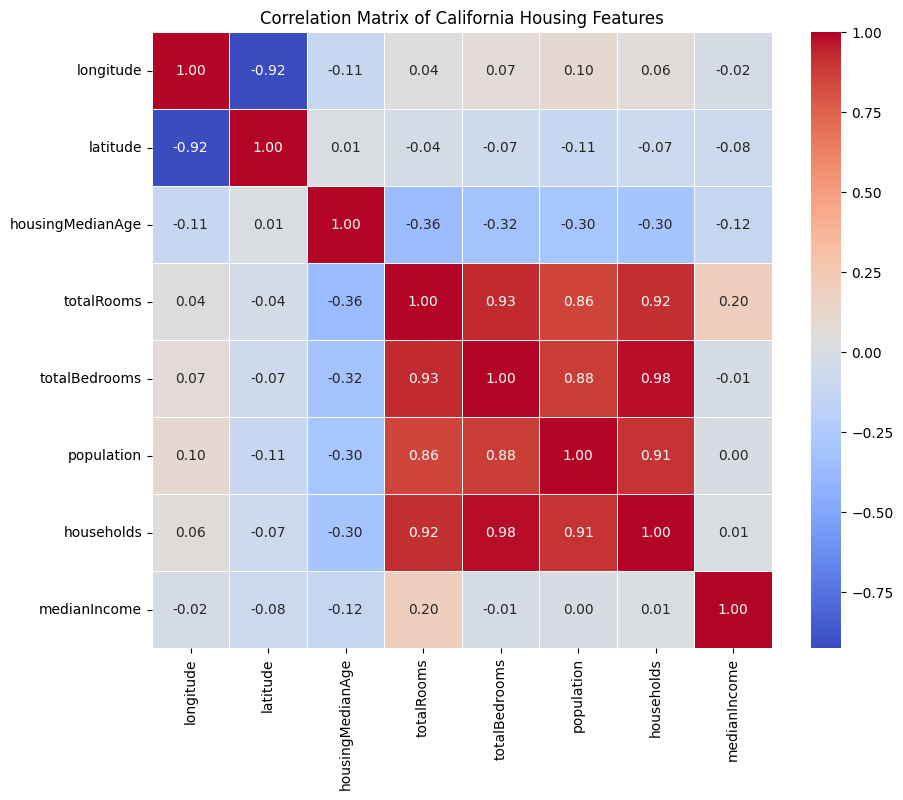

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 2. 상관관계 계산
correlation_matrix = X.corr()

# 3. 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of California Housing Features')
plt.show()

In [10]:
from sklearn.model_selection import KFold

# 2. 5-Fold 교차 검증 설정
kf = KFold(n_splits=10, shuffle=True, random_state=1)

mse_scores = []
mae_scores = []
rmse_scores = []

# 3. 교차 검증 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 모델 예측
    y_pred = model.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# 평균 및 표준편차 계산
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'5-Fold Cross-Validated Mean Squared Error (MSE): {mean_mse:.2f} ± {std_mse:.2f}')
print(f'5-Fold Cross-Validated Mean Absolute Error (MAE): {mean_mae:.2f} ± {std_mae:.2f}')
print(f'5-Fold Cross-Validated Root Mean Squared Error (RMSE): {mean_rmse:.2f} ± {std_rmse:.2f}')

# 4. 최종 모델 학습 및 예측 (전체 데이터를 사용하여 학습)
model.fit(X, y)
y_pred = model.predict(X)

5-Fold Cross-Validated Mean Squared Error (MSE): 4850643567.31 ± 223950657.64
5-Fold Cross-Validated Mean Absolute Error (MAE): 50799.90 ± 616.29
5-Fold Cross-Validated Root Mean Squared Error (RMSE): 69628.23 ± 1597.67
